*SIO221a Notes - Alford and Gille*

*Reading: Bendat and Piersol Ch. 1, with a focus on sections 1.1 and 1.3.*

Concepts covered: Version control, model fitting, mean and standard deviation, intro to PDFs.

# Lecture 2

### Recap

We got off to a good start, learned the ground rules, covered some basic programming practices and then looked at some real data.  Today we'll continue to work on programming and collaboration practices by going over version control, and then begin a brief foray into models and a few common PDFs.


### Version control: Github

But first, we'll take a little programming break since I'm noticing I need to do a task I had code for before.  I'm likely to want to do it again, so let's write a function.  Then we're going to put it on Github so we can track changes we make to it and share it with others.

Here's the code:

~~~~~~~~~~~~~~
function pier=Get2020PierData(date_start,date_end)
%function pier=Get2020PierData(date_start,date_end)
%Return temperature and pressure and time (datenum format) from the 2020
%pier record.  Path is hardcoded here; better practice would be to pass in
%a path. But I'll leave that to you!
%
%MHA SIO211a
%8/3/2022

file='/Users/malford/GoogleDrive/Work/Projects/Teaching/sio221a/FromSarah/homework_2021/data/scripps_pier-2020.nc';
time=ncread(file,'time');
temperature=ncread(file,'temperature');
pressure=ncread(file,'pressure');

date0=datenum(1970,1,1);
dnum=double(time)/3600/24+date0;


if nargin < 1
    date_start=min(dnum);
    date_end=max(dnum);
end

%i1=find(dnum > datenum(2020,6,1,0,0,0) & dnum < datenum(2020,6,7,1,1,1));
i1=find(dnum > date_start & dnum < date_end);

pier.dnum=dnum(i1);
pier.temperature=temperature(i1);
pier.pressure=pressure(i1);
pier.readme='2020 Pier data, SIO221a, function Get2020PierData.m';


%plot(dnum(i1),pressure(i1),'LineWidth',1)
%datetick('x')
%set(gca,'FontSize',16)
%xlabel('months (of 2020)','FontSize',16)
%label('Pressure (decibars)', 'FontSize',16)

%pier will then be returned.


Let's notice a few things: 
1. The use of structures.  
2. The function and its help files.  
3. How we handle arguments in matlab. 
4. Note the readme field in the structure that gives reproducability in showing the function that created the structure.

We can now call the function and get back to our data:

In [3]:
%First we can add it to our path:
addpath('/Users/malford/GoogleDrive/Work/Projects/Teaching/sio221a/SIO221a_Github_code/') %You might need to modify this depending on your path and current directory.

In [11]:
pier=Get2020PierData(datenum(2020,6,4,0,0,0),datenum(2020,6,7,0,0,0))


pier = 

  struct with fields:

           dnum: [1076x1 double]
    temperature: [1076x1 single]
       pressure: [1076x1 single]
         readme: '2020 Pier data, SIO221a, function Get2020PierData.m'



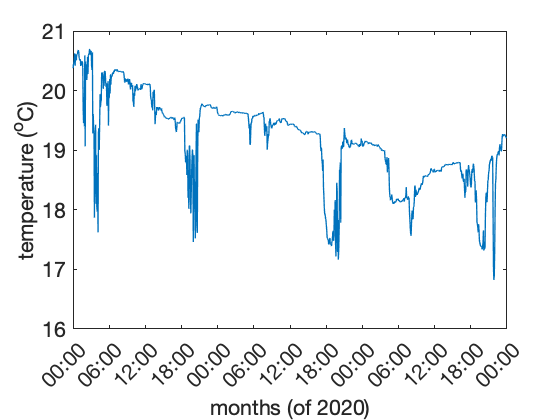

In [12]:
figure(2)
plot(pier.dnum,pier.temperature,'LineWidth',1)
datetick('x')
set(gca,'FontSize',16)
xlabel('months (of 2020)','FontSize',16)
ylabel('temperature (^oC)', 'FontSize',16)


Great, it works!  So this is a function I would like to push to my repository so that I can use it again.

Why use version control?  

###  Data vs models
What governs sea surface temperature at the Scripps pier? In an ideal and noise free world,
we could hypothesize that upper ocean temperatures are controlled by seasonal changes in air-sea
heat fluxes, $Q_{net}$. Thus

$$\frac{dT}{dt} = Q_{net}\hspace{3cm} (1)$$

If $Q_{net}$ were sinusoidal (e.g. $Q_{net} = −q \cos(\omega t)$, where $\omega = 2\pi/365.25$, and $t$ is in days), then we could solve for temperature:

$$T = T_o - \frac{q}{\omega}\sin(\omega t)\hspace{3cm} (2)$$

and we’d have a simple sinusoidal temperature. Real data are never so simple, and we inevitably
have a signal that combines multiple factors:
1. Physical forcing we understand (e.g. the annual cycle in this case.)
2. Physical forcing that we might have hoped to ignore (e.g. the diurnal cycle, or tidal processes.)
3. Instrumental noise (e.g. instrumental inaccuracies.)

**We'll get into model fitting next quarter quite a bit more.  For now, let's choose the last piece of the temperature record which showed a trend, and fit a simple model to it to demonstrate how it works.**

#### Fitting a function to data:  least-squares fitting

If we look at the temperature record how can we determine whether
temperatures are increasing or decreasing over time?  Let's suppose we're
looking for a linear trend.  Then

$$
T=T_o + b t, \hspace{3cm} (25)
$$

where $T$ represents our measured temperature data,
$T_o$ is a constant (unknown), $t$ is time, and $b$ is the time rate of
change.  We have lots of observations, so we really should represent this
using vectors (which we'll indicate with bold face):

$$
{\bf T}=T_o + b {\bf t}. \hspace{3cm} (26)
$$

We'll want to find the best estimates of the scalars $T_o$ and $b$ to match
our data.  Formally, provided that we have more than two measurements, this
is an over-determined system. Of course, we're talking about real data, so we should acknowledge
that we have noise, and our equations won't be perfect fits.  We could write:

$$
{\bf T}=T_o + b {\bf t} + {\bf n},\hspace{3cm} (5)
$$

where ${\bf T}$ represents our measured temperature data (as a vector),
$T_o$ is a constant (unknown), ${\bf t}$ is time, and $b$ is the time rate of
change (also unknown), and since this is the real world, ${\bf n}$ is noise
(representing the part of the signal that isn't a linear trend.
Formally, provided that we have more than two measurements, aside from
the unknown noise vector, this
is an over-determined system.
Since the noise is unknown, and there are lots of independent values,
the system is formally
underdetermined.  But we won't lose hope.  We just move forward under
the assumption that the noise is small.

We can write this as a matrix equation:

$$
{\bf Ax} + {\bf n}= {\bf y},\hspace{3cm} (6)
$$

where

$$
{\bf A} =  \left[\begin{array}{cc}
                              1 & t_1  \\
                              1 & t_2  \\
                              1 & t_3  \\
                              \vdots & \vdots \\
                              1 & t_N  \end{array}\right],\hspace{3cm} (7)
$$

making ${\bf A}$ an $N\times 2$ matrix.
And ${\bf y}$ is an $N$-element column vector containing, for example, our temperature data:
$$
{\bf y} =  \left[\begin{array}{c}
                              T_1  \\
                              T_2  \\
                              T_3  \\
                              \vdots \\
                              T_N  \end{array}\right].\hspace{3cm} (8)
$$

Then ${\bf x}$ is the vector of unknown coefficients, in this case with
2 elements (e.g. $x_1=T_o$ and
$x_2=b$).

$$
{\bf x} =  \left[\begin{array}{c}
                              x_1  \\
                              x_2 \end{array}\right] \hspace{3cm} (9)
$$

How can we find the best solution to this equation to minimize the misfit
between the data ${\bf y}$ and the model ${\bf Ax}$?   The
misfit could be positive or negative, and absolute values aren't mathematically
tractable.  Moreover, we can generalize our Pythagorean concept of squared distance as the sum of squares of each coordinate.  In like manner, we're really trying to measure the distance from "perfection" in our data/model space.  So let's start by squaring the misfit.

$$
\epsilon = ({\bf Ax} - {\bf y})^T({\bf Ax} - {\bf y}) = {\bf x}^T{\bf A}^T{\bf Ax} - 2{\bf x}^T{\bf A}^T{\bf y} + {\bf y}^T{\bf y}.\hspace{3cm} (10)
$$

Then we can minimize the squared misfit.  The natural route to minimization
comes by taking the derivative, and then setting the results equal to
zero.  Our unknown is ${\bf x}$, so we'll minimize in terms of that:

$$
\frac{\partial\epsilon}{\partial {\bf x}} = 2{\bf A}^T{\bf Ax} - 2{\bf A}^T{\bf y} = 0,\hspace{3cm} (11)
$$

and this implies that

$$
 {\bf A}^T{\bf Ax} = {\bf A}^T{\bf y}, \hspace{3cm} (12)
$$

so

$$
 {\bf x} = ({\bf A}^T{\bf A})^{-1}{\bf A}^T{\bf y}.\hspace{3cm} (13)
$$

Let's try to fit this very simple model to our data.

In [16]:
%Let's put our data into a vector:
i1=find(pier.dnum > datenum(2020,6,1,0,0,0) & pier.dnum < datenum(2020,6,7,1,1,1));

d=pier.temperature(i1);
time=pier.dnum(i1);
to=time(1);
time=time-to;

%d=CenteredConv(d,100,1);
%time(1:3)
%Now we'll make a "kernel" consisting of our model, at+To:
G=[ones(size(d)) time];

%Now we will solve the model Gm=d by inverting G.
m=inv(G'*G)*G'*d

%Now m(1) is an offset temperature and m(2) is the slope (or time rate of change).


m =

  2x1 single column vector

   20.1401
   -0.6452



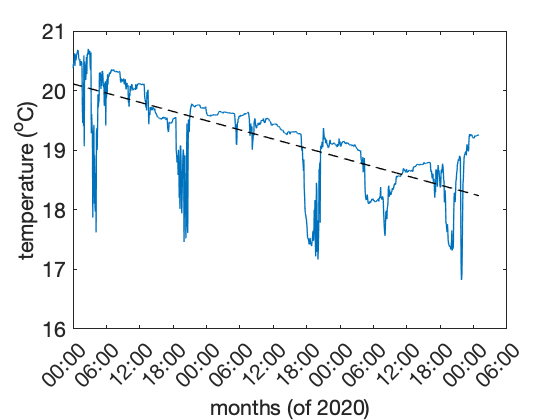

In [30]:
%Now let's plot.
figure(2)
plot(time+to,d,time+to,m(2).*time + m(1),'k--','LineWidth',1)
datetick('x')
set(gca,'FontSize',16)
xlabel('months (of 2020)','FontSize',16)
ylabel('temperature (^oC)', 'FontSize',16)


Is this a good model?


### What can we learn from our time series?

So as an example, how can we characterize the Scripps pier sea surface
temperature record?  The pier system reports measurements every 4 minutes (how can we determine this?).
We can label each individual measurement as $T_i$ to denote the $i$th
realization of our temperature measurement.  Each $T_i$ can be referred
to as a *random variable*, and for the moment we'll assume that each
observation is independent.

If we go measure temperature at the pier, what do we expect to see?
The mean or average of the temperature measurements is:

$$\mbox{mean}(T)= \overline{T} = \langle T\rangle = \frac{1}{N} \sum_{i=1}^N T_i \hspace{3cm} (3)$$

In [31]:
sum(temperature)./length(temperature)


ans =

  single

   17.7528



This is the mean of my $N$ measurements. The distinction between overlines and angular brackets is a bit arbitrary, and it is up to you, the data analyzer, to explain how you are using the notation. For example, you might see angular brackets used for spatial averages and overbars for temporal averages (or vice versa). (Angular brackets are also sometimes used for an "inner product", which might imply no division by N , so your definitions are important.)
Bendat and Piersol discuss the distinctions between the mean of an ensemble of realizations representing the same point in time, and the time average of a data value collected over time. Formally we like to think of the mean (the first moment) as the value that we would obtain if we sampled at time $t_1$ repeatedly:

$$\mu_T(t_1)=\lim_{N\to \infty} \frac{1}{N}\sum_{k=1}^{N} T_k(t_1),\hspace{3cm} (4)$$

but in reality we don't have an infinite number of samples at $t_1$, so we
often rely on the *ergodic* assumption that the statistics are stationary
so that variability in time and/or space is not significant (or that
variability in time can be interchanged with variability in space, if we
sampled one but not the other.  Thus

$$\mu_T(k) = \lim_{\tau\to \infty} \frac{1}{\tau} \int_0^\tau T_k(t)\, dt. \hspace{3cm} (5)$$

Statisticians specify Greek letters for "parameters" determined from
an entire population, and Roman letters for "statistics" determined
from a finite-sized data sample.
Compare the notation for the population mean $\overline{T}$ in (3) and the
parameter $\mu$ in (4) and (5).

We can leave a detailed discussion
of these distinctions for the future.
But we'll want to remember that the expectation value (denoted with $E$)
of the mean is
defined to represent the value that we would expect if we could
repeat our measurements many times:

$$E(T)= \lim_{N\rightarrow\infty} \frac{1}{N} \sum_{i=1}^N T_i.  \hspace{3cm} (6)$$

(Formally, the expectation value is weighted by the probability of occurrence, but the terminology is probably used most often for derived quantities, when a
Greek letter would complicate the notation.)

Knowing the mean temperature is great, but assuming that the temperature
we measured today doesn't match the mean, how can we tell if the deviation
from the mean is typical?     As a first measure, we can compute the
variance:

$$\mbox{var}(T)= E[(T-E(T))^2].  \hspace{3cm} (7)$$

When we deal with finite numbers of observations we need to be a bit careful:
$$\mbox{var}(T)= \sigma^2_{T} = \frac{1}{N-1} \sum_{i=1}^N (T_i-\overline{T})^2,  \hspace{3cm} (8)$$

and the standard deviation, which is the square-root of the variance:
$$\mbox{std}(T)= \sigma_{T} =  \sqrt{\frac{1}{N-1} \sum_{i=1}^N (T_i-E(T))^2}.  \hspace{3cm} (9)$$

(But a statistician might use $\sigma^2$ for the population variance and $s^2$ for the sample variance, with $\sigma^2$ scaled by $N$ and $s^2$ by $N −1.$) Why do we divide by $N −1$ instead of $N$? Here are a couple of ways to think about this:

1. In the limiting case in which we have only 1 sample, so $N=1$, we can
estimate the mean (badly) as our one measured value ($T_1$), but we don't
know anything about the variability, so we need our standard deviation to
be undefined.  In essence, all our information has been allocated to estimate
the mean, and we don't have enough degrees of freedom to estimate the
standard deviation as well.  Since one degree of freedom was needed for the
mean, only $N-1=0$ degrees of freedom are left for the standard deviation.


2. More formally,  you can think about the problem this way:

$$
\mbox{var}(T) = \frac{1}{M} \sum_{i=1}^N \left(T_i-\frac{1}{N}\sum_{j=1}^N T_j\right)^2 \hspace{6.6cm} (10)$$

$$ = \frac{1}{M} \sum_{i=1}^N \left(T_i^2 -\frac{2T_i}{N}\sum_{j=1}^N T_j +
\frac{1}{N^2} \sum_{j=1}^N \sum_{k=1}^N T_j T_k\right) \hspace{3cm} (11),$$

$$=   \frac{1}{M} \sum_{i=1}^N \left(T_i^2 -\frac{T_i}{N}\sum_{j=1}^N T_j \right), \hspace{6.6cm} (12)$$


where the last summation is simplified because $T_j$ and $T_k$ are uncorrelated.  We want to determine $M$. Rearranging,
$$
\mbox{var}(T)= \frac{1}{MN} \sum_{i=1}^N\sum_{j=1}^N \left(T_i(T_i- T_j)\right). \hspace{3cm} (13)
$$
For the summation over $j$, we'll end up using $N$ values of $T_j$, but
then when we start summing over $i$, every time $i=j$, $T_i-T_j = 0$,
so we'll have only $N-1$ non-zero terms in the sum.  Thus we set $M=N-1$
to avoid biasing our variance.

The mean and standard deviation give us quite a bit of information, but
they don't tell us everything.  What if temperature at the pier were generated
by a coin toss, with only two values (e.g. 25$^\circ$C or 17.2$^\circ$C)?  That
would give us a bimodal distribution.  With a hundred realizations,
we could make a histogram of temperatures:


mean_A =

   21.1000


std_A =

    3.9196



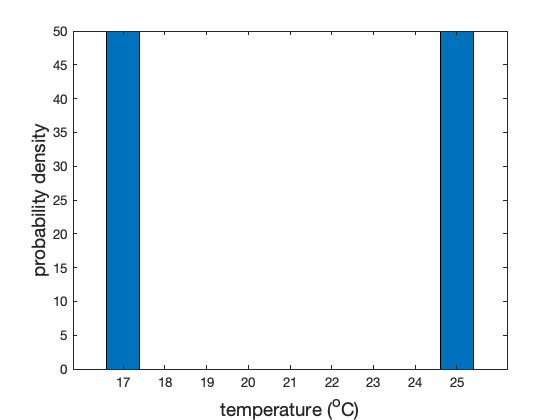

In [2]:

% bimodal distribution
fake_data_A=[ones(50,1)*25; ones(50,1)*17.2];
hist(fake_data_A,17:25);
[number_per_bin,bins]=hist(fake_data_A,17:25);
bar(bins,number_per_bin)
%plot(bins,number_per_bin/sum(number_per_bin),'LineWidth',3)
xlabel('temperature (^oC)','FontSize',14)
ylabel('probability density','FontSize',14)

mean_A=mean(fake_data_A)
std_A=std(fake_data_A)

On the other hand, we might find that pier temperatures are distributed uniformly around the mean. (In Python, the function `rand` from the `numpy.random` module will generate a uniform distribution, which looks like a top hat.)  A uniform distribution could have exactly the same mean and standard deviation as our bimodal distribution, so we wouldn't be able to tell them apart just by computing the mean and standard deviation.

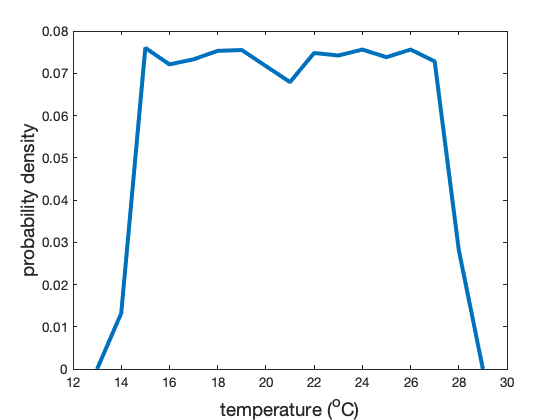

In [3]:
%%
% uniform distribution
fake_data_B=(rand(10000,1)-.5)*std(fake_data_A)/std(rand(10000,1))+mean_A;
[number_per_bin,bins]=hist(fake_data_B,13:29);
plot(bins,number_per_bin/sum(number_per_bin),'LineWidth',3)
xlabel('temperature (^oC)','FontSize',14)
ylabel('probability density','FontSize',14)

More classically, we hypothesize that data have a Gaussian distribution,
the classic bell-shaped curve, which can be represented as:
$$
p(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$
where $\mu$ is the mean and $\sigma$ is the standard deviation.
Again, we can define the Gaussian distribution to have the same mean
and standard deviation as the bimodal distribution.  Clearly we'll need
some stronger tools to interpret our data.




We could also look at a Gaussian distribution, which you learned about in Bendat and Piersol.

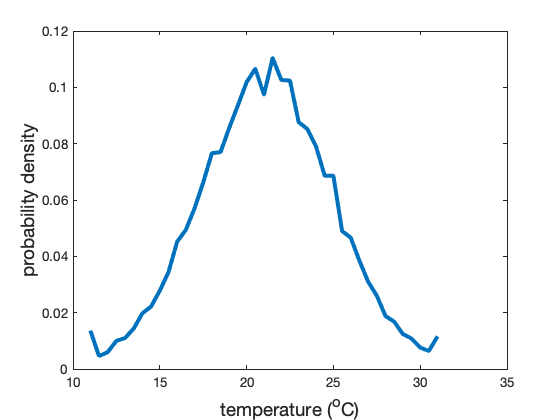

In [12]:
% Gaussian distribution
bin_size=0.5;
fake_data_C=(randn(10000,1))*std(fake_data_A)+mean_A;
[number_per_bin,bins]=hist(fake_data_C,11:bin_size:31);
plot(bins,number_per_bin/sum(number_per_bin)/bin_size,'LineWidth',3)
xlabel('temperature (^oC)','FontSize',14)
ylabel('probability density','FontSize',14)

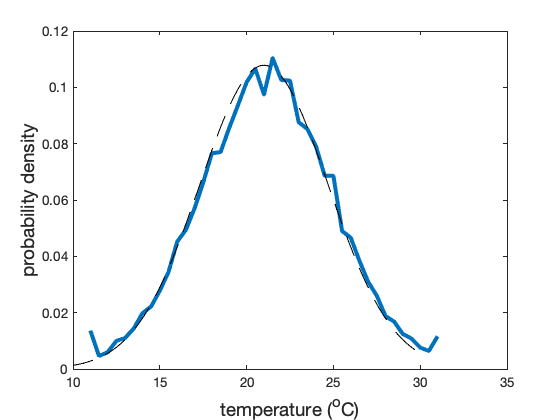

In [14]:
%Now let's plot the Gaussian distribution
mu=21;
sig=3.7;
x=10:.1:30;
gauss=1./sig./sqrt(2*pi).*exp(-(x - mu).^2./2./sig.^2);
plot(bins,number_per_bin/sum(number_per_bin)/bin_size,'LineWidth',3)
hold on
plot(x,gauss,'k--')
hold off
xlabel('temperature (^oC)','FontSize',14)
ylabel('probability density','FontSize',14)

OK, well, what is the actual distribution of our data?


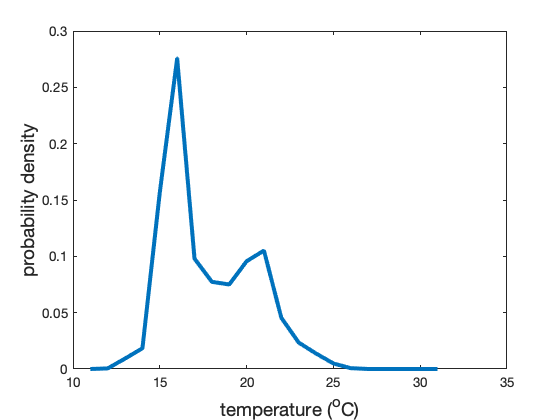

In [28]:
[number_per_bin,bins]=hist(temperature,11:31);
plot(bins,number_per_bin/sum(number_per_bin),'LineWidth',3)
xlabel('temperature (^oC)','FontSize',14)
ylabel('probability density','FontSize',14)